# <b> IMPORTING LIBRARIES

In [1]:
# REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# csv file after initial feature engineering is imported

df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/post_initial_fe_dataset.csv")
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience
0,5065438,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,0,1,0,36.0,6.0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,0,49.0,1.0
2,5111146,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,0,1,1,1,54.0,3.0
3,5010310,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,0,1,1,41.0,5.0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,0,1,1,1,47.0,15.0


In [4]:
df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
       'MARITAL_STATUS', 'HOUSE_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'JOB CATEGORY', 'BEGIN_MONTHS', 'STATUS OF LOAN',
       'TARGET', 'IS_MALE', 'OWNS_CAR', 'OWNS_PROPERTY', 'age',
       'years_of_experience'],
      dtype='object')

# <u> <b> NUMERICAL COLUMNS

# <ul>1.  AMT_INCOME_TOTAL


    inference : presence of outliers

In [9]:
df['AMT_INCOME_TOTAL'].skew()

2.773886099713111

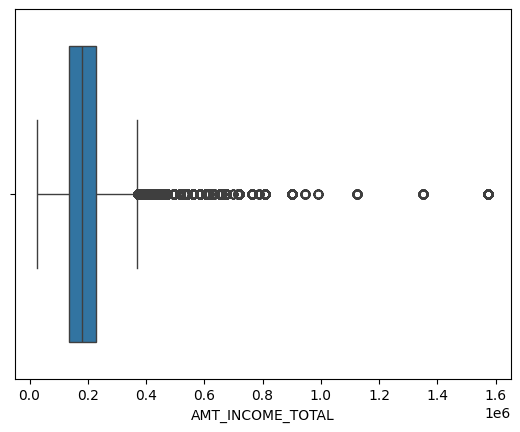

In [5]:
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.show()

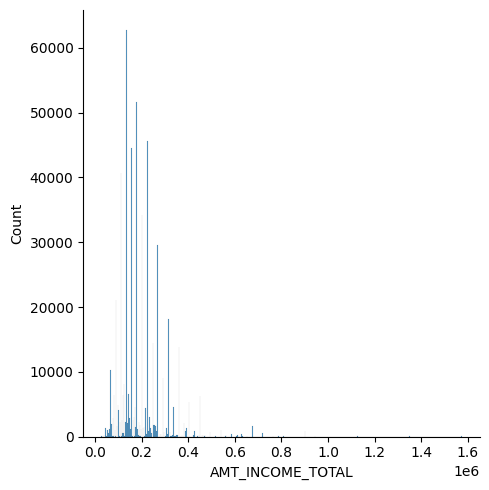

In [6]:
sns.displot(x=df['AMT_INCOME_TOTAL'])
plt.show()

# <ul>2. BEGIN_MONTHS

    inference : absence of outliers

In [7]:
df["BEGIN_MONTHS"].skew()

-0.6046987449516221

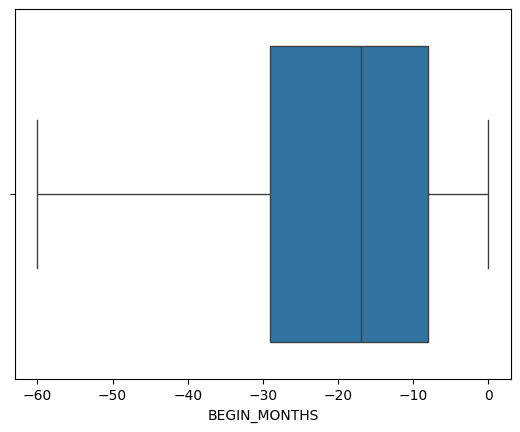

In [8]:
sns.boxplot(x=df['BEGIN_MONTHS'])
plt.show()

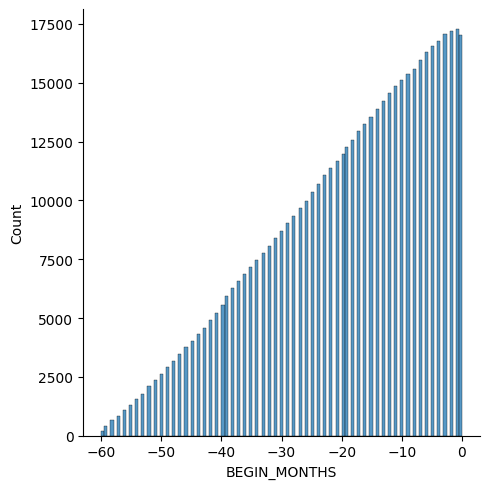

In [10]:
sns.displot(x=df['BEGIN_MONTHS'])
plt.show()

# <ul>3. 'age'

    inference : absence of outliers

In [11]:
df["age"].skew()

0.23574408381777578

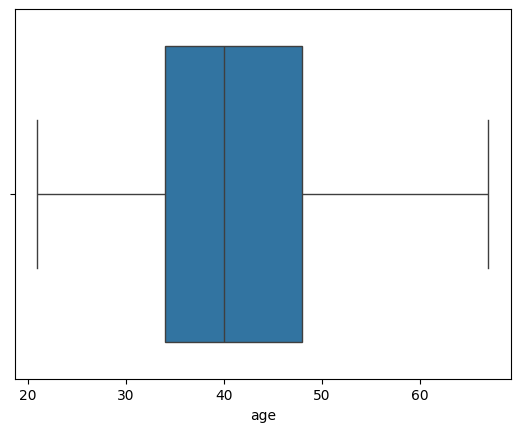

In [12]:
sns.boxplot(x=df['age'])
plt.show()

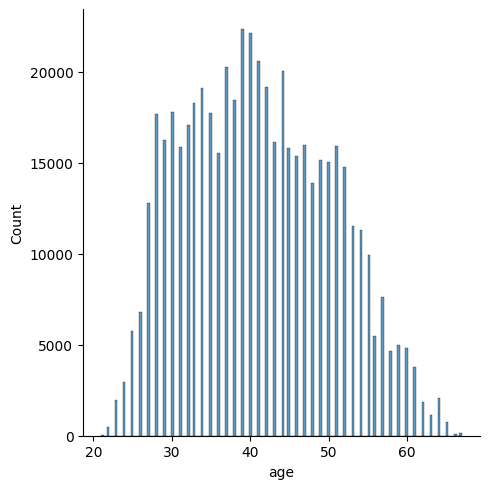

In [13]:
sns.displot(x=df['age'])
plt.show()

# <ul> 4. years_of_experience

    inference : outlier present outside IQR range

In [15]:
df["years_of_experience"].skew()

1.6674641237602033

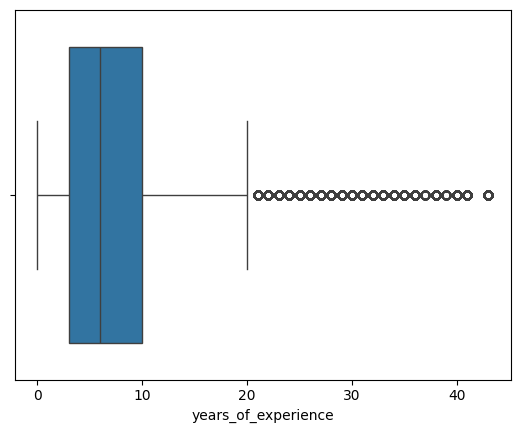

In [17]:
sns.boxplot(x=df['years_of_experience'])
plt.show()

In [18]:
df['years_of_experience'].max()

43.0

In [26]:
df["years_of_experience"].value_counts().sort_index()

0.0     14846
1.0     52352
2.0     48272
3.0     47819
4.0     48559
5.0     41524
6.0     38339
7.0     37040
8.0     32155
9.0     28804
10.0    23290
11.0    18647
12.0    13157
13.0    13000
14.0     9850
15.0    12436
16.0     5802
17.0     5676
18.0     4840
19.0     5156
20.0     6838
21.0     3661
22.0     3575
23.0     2802
24.0     3181
25.0     2226
26.0     1986
27.0     1907
28.0     2374
29.0     1244
30.0      592
31.0      397
32.0      810
33.0     1404
34.0      717
35.0      457
36.0      498
37.0       78
38.0      236
39.0       83
40.0      422
41.0      482
43.0      133
Name: years_of_experience, dtype: int64

# <b> CATEGORICAL COLUMNS

# <ul> 1. 'CNT_CHILDREN'

In [28]:
df['CNT_CHILDREN'].value_counts()

0.0    343151
1.0    127695
2.0     66821
Name: CNT_CHILDREN, dtype: int64

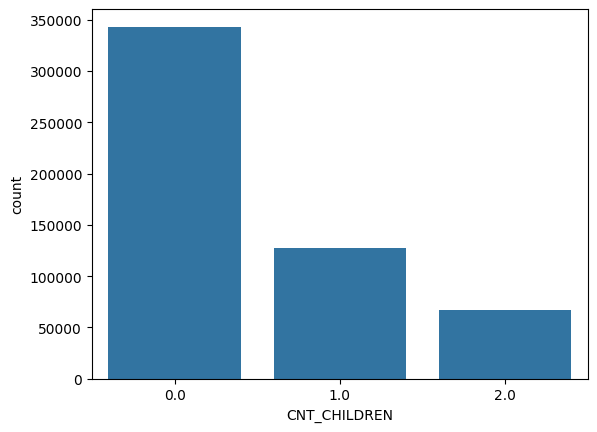

In [27]:
sns.countplot(x='CNT_CHILDREN', data=df)
plt.show()

In [30]:
cross_tab = pd.crosstab(df['CNT_CHILDREN'], df['TARGET'], normalize='index')
cross_tab

# 1 indicates risk user


TARGET,0,1
CNT_CHILDREN,,
0.0,0.996535,0.003465
1.0,0.995403,0.004597
2.0,0.997216,0.002784


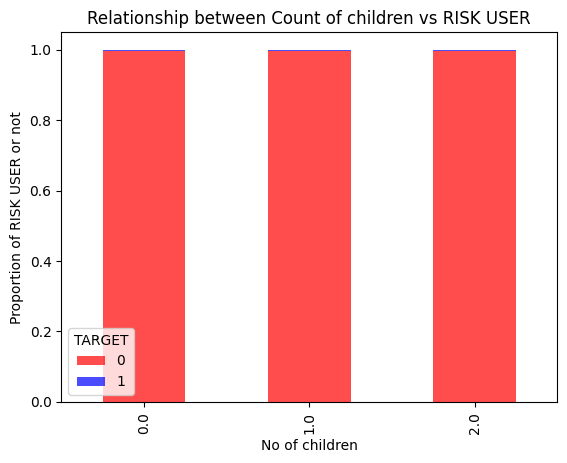

In [32]:
ax = cross_tab.plot(kind='bar', stacked=True, color=['red', 'blue'], alpha=0.7)
ax.set_ylabel('Proportion of RISK USER or not')
ax.set_xlabel('No of children')

plt.title('Relationship between Count of children vs RISK USER')
plt.show()

INFERENCE : NO of risk users are very less due to class imbalance problem

#spare columns

In [ ]:
[#'ID', 'CNT_CHILDREN', #'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
       'MARITAL_STATUS', 'HOUSE_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'JOB CATEGORY', #'BEGIN_MONTHS',
 'STATUS OF LOAN',
       'TARGET', 'IS_MALE', 'OWNS_CAR', 'OWNS_PROPERTY',#'age',
       #'years_of_experience'
 ]